In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

from scipy.special import erf, erfc

from matplotlib import animation, rc
from IPython.display import HTML

In [27]:
x = np.linspace(0, 1, 101)
t = np.linspace(0, 10, 401)

xv, tv = np.meshgrid(x, t)

a = 1
L = 1
Fov = a*tv/(xv**2)
Fox = 1/(2*np.sqrt(Fov))
b = 1
Ti = 50

T = ((1 + 2*Fox**2)*erfc(Fox) - 2/np.sqrt(np.pi)*Fox*np.exp(-Fox**2))*b*tv + Ti
T[0,:] = Ti

C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


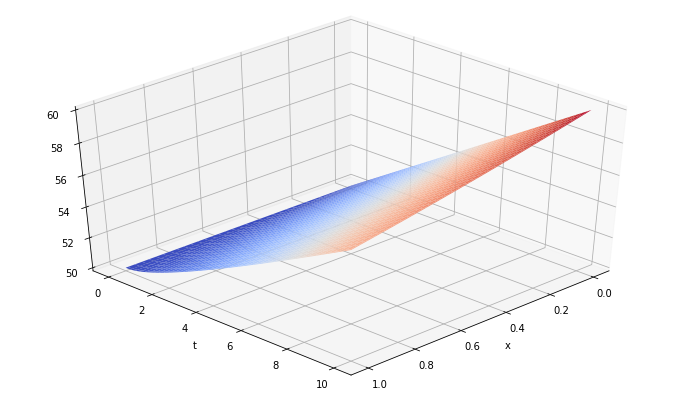

In [28]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, T, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=40, azim=45)

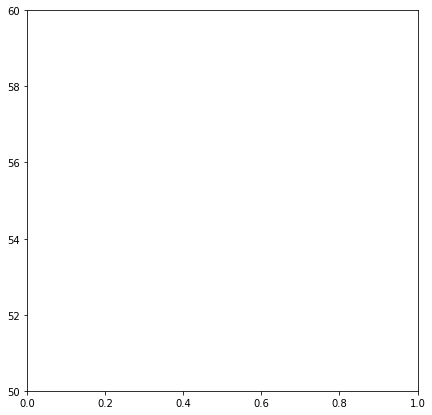

In [29]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.set_xlim((0, 1))
ax.set_ylim((50, 60))


line, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    Tn = T[i, :]
    line.set_data(x, Tn)
    
    return (line,)

In [31]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=390, interval=15, blit=True)
HTML(anim.to_html5_video())